Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Centroid for Questions: [0.01965602 0.002457   0.004914   0.00982801 0.00982801 0.002457
 0.01228501 0.03439803 0.004914   0.004914   0.002457   0.00737101
 0.002457   0.002457   0.002457   0.01228501 0.002457   0.002457
 0.004914   0.002457   0.002457   0.002457   0.002457   0.004914
 0.02948403 0.00982801 0.01474201 0.002457   0.002457   0.01719902
 0.03931204 0.004914   0.01228501 0.2039312  0.002457   0.002457
 0.01719902 0.01228501 0.00982801 0.002457   0.002457   0.00982801
 0.002457   0.002457   0.002457   0.002457   0.004914   0.004914
 0.23832924 0.002457   0.01474201 0.00737101 0.004914   0.01965602
 0.002457   0.00737101 0.004914   0.004914   0.002457   0.02457002
 0.002457   0.002457   0.004914   0.002457   0.002457   0.002457
 0.00737101 0.004914   0.002457   0.06142506 0.00737101 0.004914
 0.002457   0.002457   0.01228501 0.04668305 0.004914   0

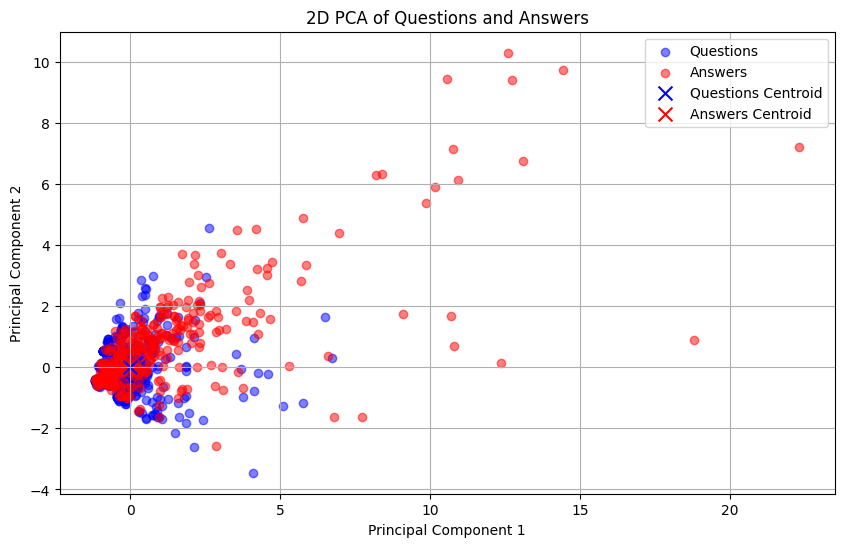

MEAN of No_of_questoning_words:  0.6275395033860045
VARIANCE of No_of_questoning_words:  0.8070971062272929


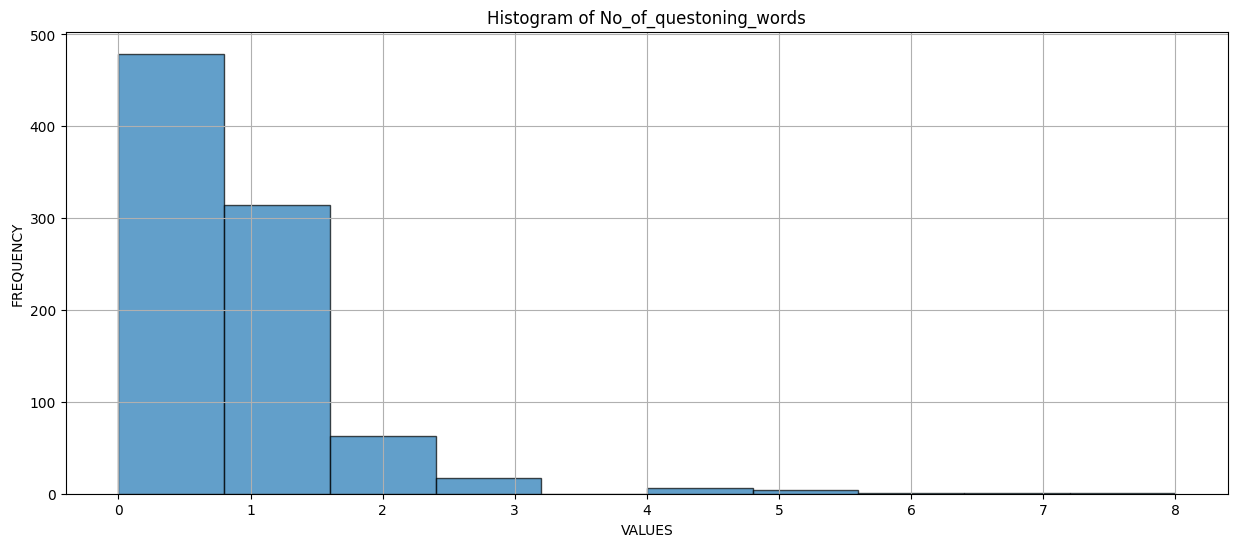

No_of_words               3
No_of_questoning_words    1
Has_Question_Mark         1
label                     1
Name: 0, dtype: object
No_of_words               21
No_of_questoning_words     2
Has_Question_Mark          1
label                      1
Name: 1, dtype: object


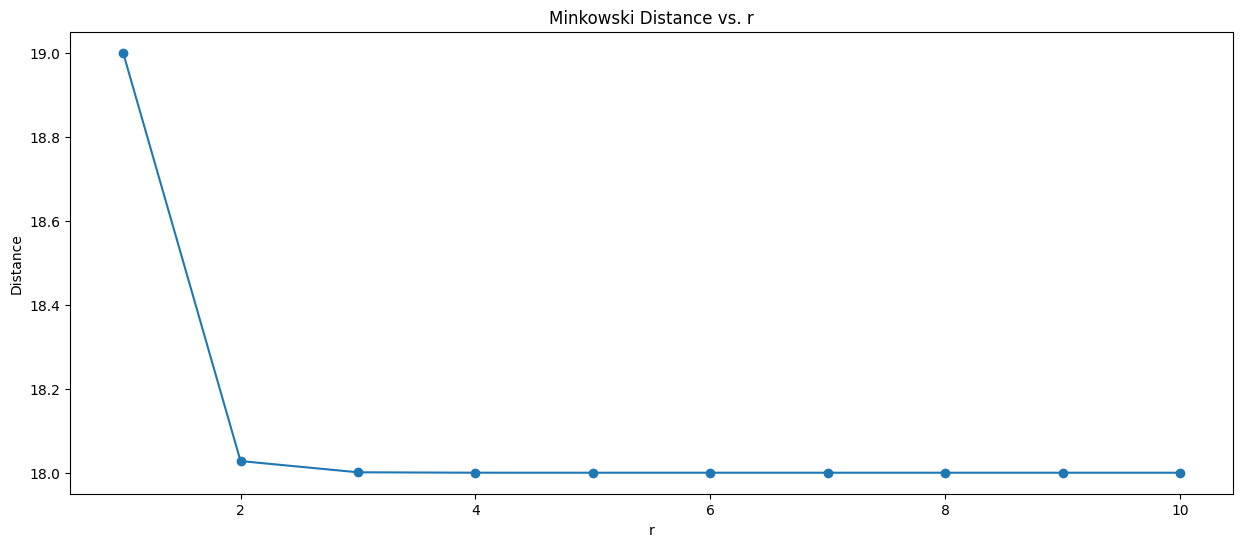

Training set: (620, 1574) Test set:  (266, 1574)
PREDICTED VALUES FOR TEST DATA:
 [1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1
 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 1]
ACTUAL LABLES OF TEST DATA:
 [1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1
 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0

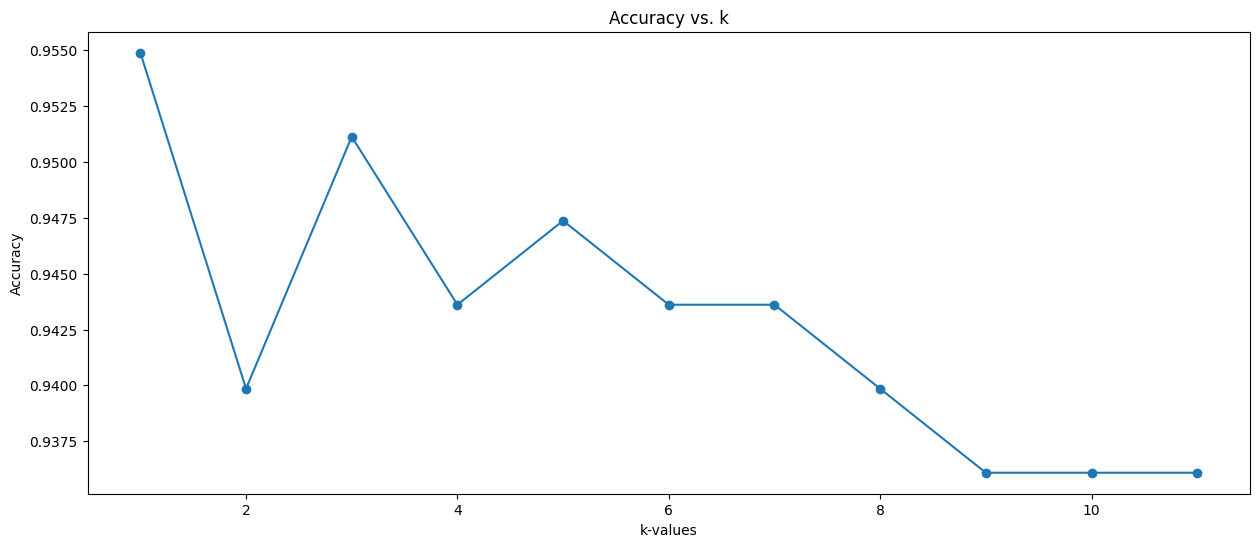

Confusion Matrix:
 [[138   5]
 [  7 116]]
Precision: 0.9586776859504132
Recall: 0.943089430894309
F1 Score: 0.9508196721311475


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
drive.mount('/content/drive')
sentence_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MLLAB3.xlsx')
questions = sentence_data[sentence_data['label'] == 1]['Text']
answers = sentence_data[sentence_data['label'] == 0]['Text']
# Vectorize the text data
vectorizer = CountVectorizer()
questions_vectors = vectorizer.fit_transform(questions).toarray()
answers_vectors = vectorizer.transform(answers).toarray()
# Calculate the mean vector for each class
centroid_questions = np.mean(questions_vectors, axis=0)
centroid_answers = np.mean(answers_vectors, axis=0)

print("Centroid for Questions:", centroid_questions)
print("Centroid for Answers:", centroid_answers)
# Calculate the standard deviation for each class
spread_questions = np.std(questions_vectors, axis=0)
spread_answers = np.std(answers_vectors, axis=0)

print("Spread for Questions:", spread_questions)
print("Spread for Answers:", spread_answers)
# Calculate the Euclidean distance between the centroids
distance = np.linalg.norm(centroid_questions - centroid_answers)
print(f"Distance between the centroids: {distance:.2f}")

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
questions_pca = pca.fit_transform(questions_vectors)
answers_pca = pca.transform(answers_vectors)

# Calculate new centroids in 2D space
centroid_questions_2d = np.mean(questions_pca, axis=0)
centroid_answers_2d = np.mean(answers_pca, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(questions_pca[:, 0], questions_pca[:, 1], color='blue', alpha=0.5, label='Questions')
plt.scatter(answers_pca[:, 0], answers_pca[:, 1], color='red', alpha=0.5, label='Answers')

# Plotting the centroids
plt.scatter(centroid_questions_2d[0], centroid_questions_2d[1], color='blue', marker='x', s=100, label='Questions Centroid')
plt.scatter(centroid_answers_2d[0], centroid_answers_2d[1], color='red', marker='x', s=100, label='Answers Centroid')

# Adding labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Questions and Answers')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()
feature_name = 'No_of_questoning_words'
feature_values = sentence_data[feature_name]
# mean and variance
mean = np.mean(feature_values)
variance = np.var(feature_values)
print("MEAN of No_of_questoning_words: ",mean)
print("VARIANCE of No_of_questoning_words: ",variance)
# Histogram Plot
plt.figure(figsize=(15, 6))
plt.hist(feature_values, bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram of No_of_questoning_words")
plt.xlabel("VALUES")
plt.ylabel("FREQUENCY")
plt.grid(True)
plt.show()
vector1=sentence_data.iloc[0,1:]
vector2=sentence_data.iloc[1,1:]
print(vector1)
print(vector2)
# Minkowski dstance for r 1 to 10
distance=[]
for r in range(1,11):
    dist =np.sum(np.abs(vector1 - vector2)**r)**(1/r)
    distance.append(dist)
#distance vs r plot
plt.figure(figsize=(15, 6))
plt.plot(range(1,11), distance, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Distance')
plt.show()
#data split into training and testing
X = sentence_data.iloc[:,1 :-1]
Y = sentence_data['label']
X_text = sentence_data['Text']
# text to numerical features using TF-IDF conversion
tfidf_vectorizer = TfidfVectorizer()
X_text_features = tfidf_vectorizer.fit_transform(X_text)
# numerical features to a numpy array conversion
X = X.values
X = hstack([X, X_text_features])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("Training set:",X_train.shape,"Test set: ",X_test.shape)
# Instantiate the kNN classifier with k=3
KNN = KNeighborsClassifier(n_neighbors=3)
# Fit the classifier on the training data
KNN.fit(X_train, Y_train)
# Predict on the entire test data
y_pred = KNN.predict(X_test)
print("PREDICTED VALUES FOR TEST DATA:\n", y_pred)
print("ACTUAL LABLES OF TEST DATA:\n", Y_test.values)
# Testing the accuracy of the kNN classifier
accuracy3 = KNN.score(X_test, Y_test)
print(f"ACCURACY OF KNN CLASSIFIER: {accuracy3 * 100:.2f}%")

# Select a specific test vector (e.g., the first one in the test set)
test_vect = X_test[0]

# Ensure the test vector is reshaped to 2D
predicted_class = KNN.predict(test_vect.reshape(1, -1))
print("Predicted class for the selected test vector:", predicted_class)

# Print the actual class for comparison
print("Actual class for the selected test vector:", Y_test.iloc[0])
#for k=3
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, Y_train)
# entire test data prediction
y_pred = KNN.predict(X_test)
accuracy1 = KNN.score(X_test, Y_test)
print(f"ACCURACY OF KNN CLASSIFIER WITH K=3: {accuracy3 * 100:.2f}%")
print(f"ACCURACY OF KNN CLASSIFIER WITH K=1: {accuracy1 * 100:.2f}%")
accuracies = []
# varying k value from 1 to 11
for k in range(1, 12):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, Y_train)
    accuracies.append(KNN.score(X_test,Y_test))
# accuracy vs. k
plt.figure(figsize=(15, 6))
plt.plot(range(1, 12), accuracies, marker='o')
plt.title('Accuracy vs. k')
plt.xlabel('k-values')
plt.ylabel('Accuracy')
plt.show()
#confusion matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
precision = precision_score(Y_test,y_pred )
recall = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
